<a href="https://colab.research.google.com/github/Yewon-dev/boostcamp-AI-Tech/blob/master/TIL/%5BPython%5DMatplotlib_Facet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple View
- **Facet** : 분할을 의미
- 다양한 관점을 전달할 수 있다.
  - 같은 데이터셋, 서로 다른 인코딩
  - 같은 방법으로 동시에 여러 feature 관찰
  - 부분 집합을 세세하게 표현


## subplots
- `plt.subplot()`
- `plt.figure()`+ `fig.add_subplot()`
- `plt.subplots()`

*parameters*
- `figuresize`
- `dpi` : Dots for Inch
- `shaerx`, `sharey` : 축 공유
- `squeeze` : 2차원으로 배열을 받으며 가변 크기에 대해 반복문 사용 유리
- `flatten` : 1중 반복문을 쓰고 싶을 때 사용
- `aspect`

### Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
student = pd.read_csv('./StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Group to Number
groups = sorted(student['race/ethnicity'].unique())
gton = dict(zip(groups , range(5)))

# Group에 따라 색 1, 2, 3, 4, 5
student['color'] = student['race/ethnicity'].map(gton)

In [ ]:
# color list to color map
print(plt.cm.get_cmap('tab10').colors)

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))


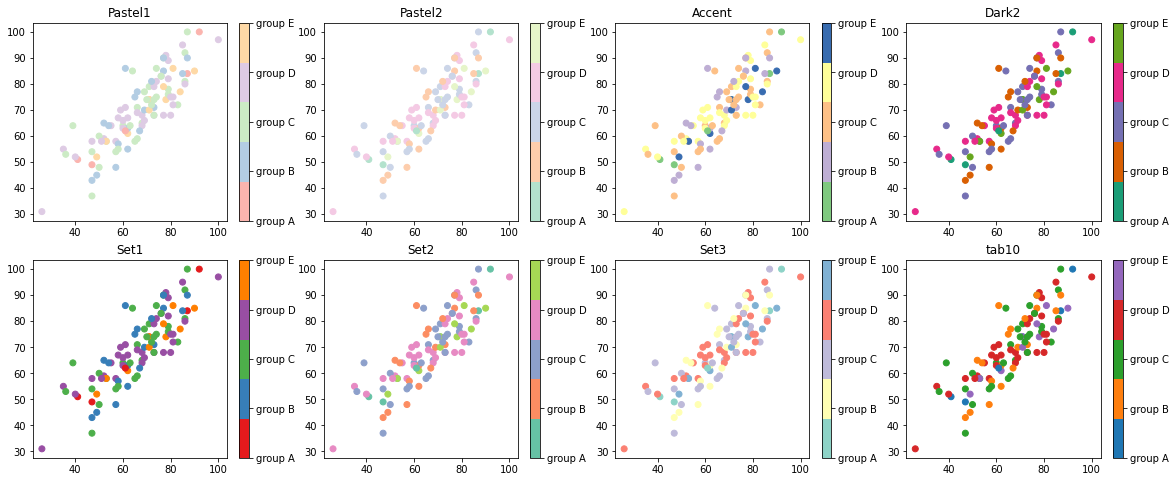

In [ ]:
from matplotlib.colors import ListedColormap

qualitative_cm_list = ['Pastel1', 'Pastel2', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(qualitative_cm_list):    
    pcm = axes[idx].scatter(student_sub['math score'], student_sub['reading score'],
                     c=student_sub['color'], cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5])
                     )
    cbar = fig.colorbar(pcm, ax=axes[idx], ticks=range(5))
    cbar.ax.set_yticklabels(groups)
    axes[idx].set_title(cm)
    
plt.show()

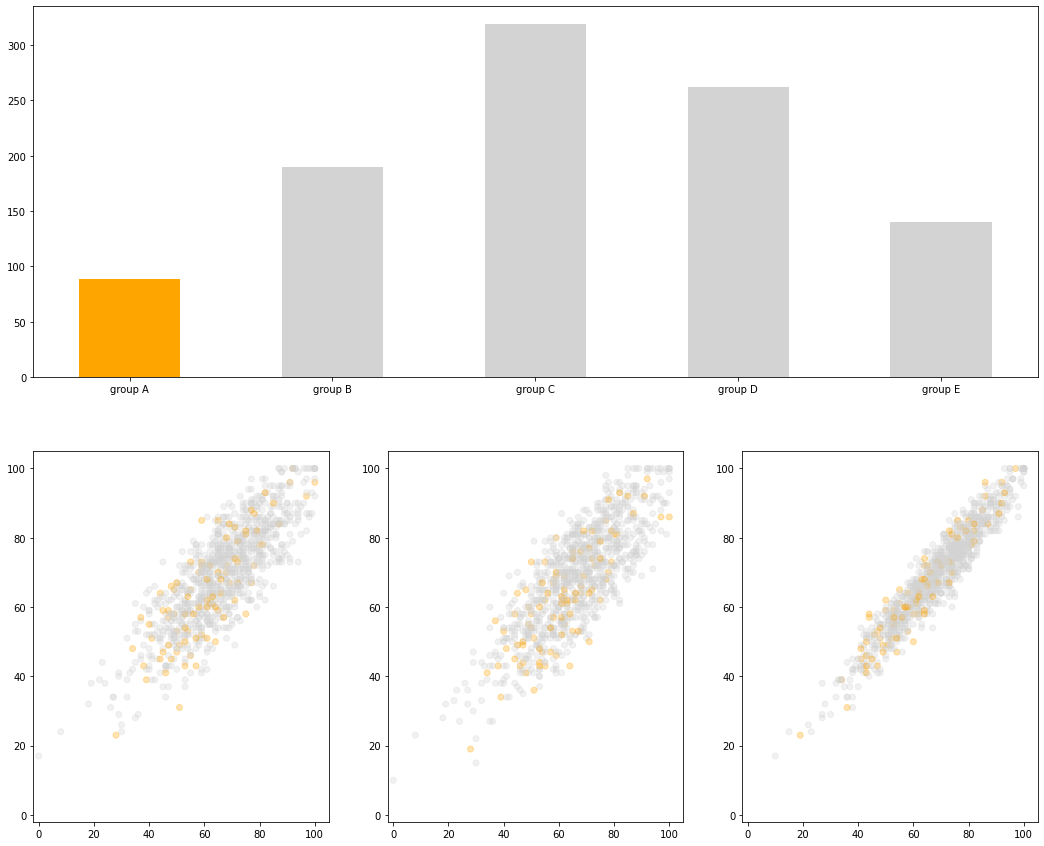

In [ ]:
a_color, nota_color = 'orange', 'lightgray'

colors = student['race/ethnicity'].apply(lambda x : a_color if x =='group A' else nota_color)
color_bars = [a_color] + [nota_color]*4

fig = plt.figure(figsize=(18, 15))
groups = student['race/ethnicity'].value_counts().sort_index()

ax_bar = fig.add_subplot(2, 1, 1)
ax_bar.bar(groups.index, groups, color=color_bars, width=0.5)

ax_s1 = fig.add_subplot(2, 3, 4)
ax_s2 = fig.add_subplot(2, 3, 5)
ax_s3 = fig.add_subplot(2, 3, 6)

ax_s1.scatter(student['math score'], student['reading score'], color=colors, alpha=0.3)
ax_s2.scatter(student['math score'], student['writing score'], color=colors, alpha=0.3)
ax_s3.scatter(student['writing score'], student['reading score'], color=colors, alpha=0.3)

for ax in [ax_s1, ax_s2, ax_s3]:
    ax.set_xlim(-2, 105)
    ax.set_ylim(-2, 105)

plt.show()